In [4]:
import pandas as pd
import numpy as np

import math
import requests
import pickle
import random
import time
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

import patsy
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, lars_path, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score



%matplotlib inline


In [5]:
with open('suicide1.pickle', 'rb') as read_file:
    df = pickle.load(read_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 1 to 3129
Data columns (total 30 columns):
County_x                              527 non-null object
County_code                           527 non-null float64
rate                                  527 non-null float64
State_x                               527 non-null object
% Fair/Poor Health                    527 non-null int64
% LBW                                 527 non-null float64
% Smokers                             527 non-null int64
% Obese                               527 non-null int64
Food Environment Index                527 non-null float64
% Physically Inactive                 527 non-null int64
% Excessive Drinking                  527 non-null int64
% driving deaths Alcohol-Impaired     527 non-null float64
Teen Birth Rate                       527 non-null float64
% Uninsured                           527 non-null float64
PCP Ratio                             527 non-null float64
Dentist Ratio        

In [6]:
df.describe()

,County_code,rate,% Fair/Poor Health,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% Excessive Drinking,% driving deaths Alcohol-Impaired,...,% Unemployed,% Children in Poverty,Income Ratio inequality,% Single-Parent Households,Association Rate,Violent Crime Rate,Average Daily PM2.5,% Severe Housing Problems,% Long Commute - Drives Alone,% With Access eng 1
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,5.270000e+02
mean,29063.626186,16.626186,15.962049,8.055028,16.227704,29.381404,7.735863,22.324478,18.700190,29.396584,...,4.391841,17.759013,4.593169,33.121442,9.666034,362.104364,9.784630,17.055028,32.277040,5.405033e+07
std,15965.889690,6.568750,3.598490,1.439135,3.179268,4.677496,0.881358,4.665526,2.930964,7.358567,...,1.294897,7.441840,0.695580,8.413757,3.128740,230.564332,1.904001,4.567076,11.534174,2.530918e+07
min,1003.000000,4.000000,8.000000,6.000000,7.000000,14.000000,1.800000,9.000000,10.000000,8.000000,...,2.100000,3.000000,3.200000,11.000000,1.700000,33.000000,3.900000,9.000000,8.000000,1.303210e+05
25%,13103.000000,12.200000,13.000000,7.000000,14.000000,26.000000,7.200000,19.000000,17.000000,25.000000,...,3.600000,12.000000,4.100000,27.000000,7.600000,200.500000,8.400000,14.000000,23.000000,3.336218e+07
50%,30029.000000,15.300000,16.000000,8.000000,16.000000,30.000000,7.800000,22.000000,19.000000,30.000000,...,4.200000,17.000000,4.500000,33.000000,9.500000,312.000000,9.900000,16.000000,32.000000,5.220062e+07
75%,42050.000000,20.000000,18.000000,9.000000,18.000000,33.000000,8.300000,26.000000,20.000000,34.000000,...,5.000000,22.000000,4.900000,38.500000,11.400000,454.000000,11.000000,19.000000,41.000000,7.480520e+07
max,56025.000000,47.100000,32.000000,15.000000,27.000000,42.000000,10.000000,35.000000,29.000000,55.000000,...,17.000000,44.000000,9.100000,64.000000,27.600000,1820.000000,19.700000,39.000000,66.000000,1.000000e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 1 to 3129
Data columns (total 30 columns):
County_x                              527 non-null object
County_code                           527 non-null float64
rate                                  527 non-null float64
State_x                               527 non-null object
% Fair/Poor Health                    527 non-null int64
% LBW                                 527 non-null float64
% Smokers                             527 non-null int64
% Obese                               527 non-null int64
Food Environment Index                527 non-null float64
% Physically Inactive                 527 non-null int64
% Excessive Drinking                  527 non-null int64
% driving deaths Alcohol-Impaired     527 non-null float64
Teen Birth Rate                       527 non-null float64
% Uninsured                           527 non-null float64
PCP Ratio                             527 non-null float64
Dentist Ratio        

In [8]:
df['lograte'] = np.log(df['rate'])
df = df.drop('rate', axis = 1)

In [9]:
# OLS without patsy

objectdroplist = ['State_x', 'County_code', 'County_x']

X = df.drop(columns=["lograte"] + objectdroplist).astype(float)
y = df.loc[:,"lograte"].astype(float)

model = sm.OLS(y, sm.add_constant(X), data = df)
results = model.fit() 
results.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lograte   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     38.10
Date:                Wed, 09 Oct 2019   Prob (F-statistic):          3.23e-101
Time:                        15:46:01   Log-Likelihood:                 41.884
No. Observations:                 527   AIC:                            -29.77
Df Residuals:                     500   BIC:                             85.45
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  7.0787      0.430     16.474      0.000       6.234       7.923
% Fair/Poor Health                    -0.0131      0.007     -1.818      0.070      -0.027       0.001
% LBW                                 -0.0321      0.012     -2.683      0.008      -0.056      -0.009
% Smokers                              0.0351      0.006      5.675      0.000       0.023       0.047
% Obese                               -0.0130      0.004     -3.251      0.001      -0.021      -0.005
Food Environment Index                -0.1515      0.022     -6.914      0.000      -0.195      -0.108
% Physically Inactive                 -0.0064      0.004     -1.493      0.136      -0.015       0.002
% Excessive Drinking                  -0.0067      0.005     -1.400      0.162      -0.016       0.003
% driving deaths Alcohol-Impaired      0.0028      0.002      1.816      0.070      -0.000       0.006
Teen Birth Rate                        0.0071      0.002      3.180      0.002       0.003       0.011
% Uninsured                           -0.0106      0.004     -2.434      0.015      -0.019      -0.002
PCP Ratio                           5.969e-05   2.49e-05      2.397      0.017    1.08e-05       0.000
Dentist Ratio                      -6.421e-05   2.54e-05     -2.527      0.012      -0.000   -1.43e-05
MHP Ratio                           3.051e-05   3.65e-05      0.835      0.404   -4.12e-05       0.000
Preventable Hosp. Rate             -3.297e-05   1.33e-05     -2.470      0.014   -5.92e-05   -6.75e-06
Graduation Rate                       -0.0037      0.002     -1.671      0.095      -0.008       0.001
% Some College                        -0.0119      0.003     -4.690      0.000      -0.017      -0.007
% Unemployed                          -0.0415      0.012     -3.534      0.000      -0.065      -0.018
% Children in Poverty                  0.0021      0.004      0.495      0.621      -0.006       0.010
Income Ratio inequality               -0.0125      0.026     -0.489      0.625      -0.063       0.038
% Single-Parent Households            -0.0101      0.003     -3.164      0.002      -0.016      -0.004
Association Rate                       0.0017      0.005      0.358      0.721      -0.008       0.011
Violent Crime Rate                 -1.852e-05      7e-05     -0.265      0.791      -0.000       0.000
Average Daily PM2.5                   -0.0343      0.006     -5.332      0.000      -0.047      -0.022
% Severe Housing Problems             -0.0220      0.005     -4.733      0.000      -0.031      -0.013
% Long Commute - Drives Alone         -0.0041      0.001     -3.115      0.002      -0.007      -0.002
% With Access eng 1                -3.056e-09    6.5e-10     -4.704      0.000   -4.33e-09   -1.

In [14]:
alphavec = 10**np.linspace(-2,2,200)
l1vec = 10**np.linspace(-2,2,200)

objectdroplist = ['State_x', 'County_code', 'County_x']

X = df.drop(columns=["lograte"] + objectdroplist).astype(float)
y = df.loc[:,"lograte"].astype(float)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=.2, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=.25, random_state=2)

# models
lm = LinearRegression()
lm_reg = RidgeCV(alphas = alphavec, cv=5)
lm_la = LassoCV(alphas = alphavec, cv=5,)
lm_en = ElasticNetCV(alphas = alphavec, l1_ratio = 0.6, cv=5)

# fit standard OLS
lm.fit(X_trainval, y_trainval)

# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_trainval_scaled = scaler.transform(X_trainval)


# fit Ridge
lm_reg.fit(X_trainval_scaled, y_trainval)
    
# fit LASSO
lm_la.fit(X_trainval_scaled, y_trainval)
    
# fit ElasticNet
lm_en.fit(X_trainval_scaled, y_trainval)

# scale the test data 
X_test_scaled = scaler.transform(X_test.values)


# fit the test data to the model
lm_pred = lm.predict(X_test)
reg_pred = lm_reg.predict(X_test_scaled)
la_pred = lm_la.predict(X_test_scaled)
en_pred = lm_en.predict(X_test_scaled)





#Mean Absolute Error (MAE)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

# print out results!


print('R^2 values')

print(f'Simple cv r^2: {(r2_score(y_test, lm_pred))}')
print(f'Ridge cv r^2: {(r2_score(y_test, reg_pred))}')
print(f'LASSO cv r^2: {(r2_score(y_test, la_pred))}')
print(f'ElasticNet cv r^2: {(r2_score(y_test, en_pred))}')

print('\nmae values')

lm_mae = mae(np.exp(y_test), np.exp(lm_pred))
reg_mae = mae(np.exp(y_test), np.exp(reg_pred))
la_mae = mae(np.exp(y_test), np.exp(la_pred))
en_mae = mae(np.exp(y_test), np.exp(en_pred))

print(f'Simple mae: {lm_mae}')
print(f'Ridge mae: {reg_mae}')
print(f'LASSO mae: {la_mae}')
print(f'ElasticNet mae: {en_mae}')



# print(lm_la.score(X_test_scaled, y_test))


R^2 values
Simple cv r^2: 0.6712265460183864
Ridge cv r^2: 0.6735322092804827
LASSO cv r^2: 0.656697219206154
ElasticNet cv r^2: 0.671495421994847

mae values
Simple mae: 2.8039719474138454
Ridge mae: 2.7997814523658597
LASSO mae: 2.888858472010291
ElasticNet mae: 2.8327266371152593


In [42]:
import regressors
from regressors import stats    

stats.summary(lm_la, X_trainval_scaled, Y_trainval)


ModuleNotFoundError: No module named 'regressors'

In [30]:
print(lm_reg.alpha_)
print(lm_la.alpha_)
print(lm_en.alpha_)

19.791668678535572
0.01
0.01


In [31]:
print(lm.intercept_)
print(lm_reg.intercept_)
print(lm_la.intercept_)
print(lm_en.intercept_)

7.085650755766114
2.754312879286745
2.7540517917789904
2.7541151082206476


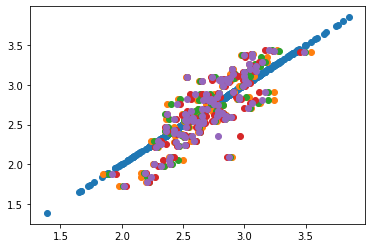

In [32]:
plt.scatter(df['lograte'], y)
plt.scatter(lm_pred, y_test)
plt.scatter(reg_pred, y_test)
plt.scatter(la_pred, y_test)
plt.scatter(en_pred, y_test)

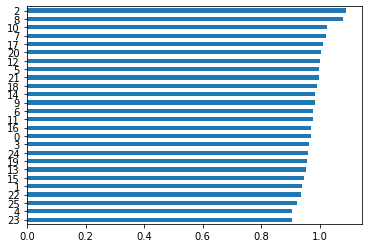

In [34]:
b = list(zip((df.columns[4:]), lm.coef_, lm_reg.coef_, lm_la.coef_, lm_en.coef_))

coefs = pd.DataFrame.from_records(b, columns =['feature', 'OLS', 'LinReg', 'LASSO', 'ElasticNet']) 
col = new.loc[: , "LinReg":"ElasticNet"]

coefs['mean'] = col.mean(axis=1)
coefs['mean_abs'] = abs(new['mean'])
coefs['mean_abs_exp'] = np.exp(new['mean'])

coefs = coefs.sort_values('mean_abs_exp', ascending = True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
new
d = coefs['mean_abs_exp'].plot.barh()

In [35]:
coefs

,feature,OLS,LinReg,LASSO,ElasticNet,mean,mean_abs,mean_abs_exp
23,% Long Commute - Drives Alone,-0.022,-0.093,-0.105,-0.103,-0.100,0.100,0.905
4,% Physically Inactive,-0.144,-0.111,-0.084,-0.103,-0.099,0.099,0.905
25,lograte,-0.000,-0.077,-0.084,-0.081,-0.081,0.081,0.922
22,% Severe Housing Problems,-0.032,-0.062,-0.068,-0.065,-0.065,0.065,0.937
1,% Smokers,-0.039,-0.059,-0.065,-0.063,-0.062,0.062,0.940
15,% Unemployed,-0.011,-0.073,-0.033,-0.058,-0.055,0.055,0.947
13,Graduation Rate,-0.000,-0.044,-0.055,-0.051,-0.050,0.050,0.951
19,Association Rate,-0.011,-0.067,-0.024,-0.045,-0.046,0.046,0.956
24,% With Access eng 1,-0.003,-0.040,-0.040,-0.041,-0.040,0.040,0.961
3,Food Environment Index,-0.015,-0.055,-0.022,-0.042,-0.040,0.040,0.961


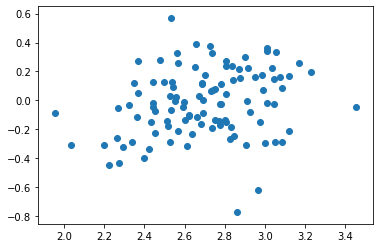

In [37]:
plt.scatter(la_pred, (y_test-la_pred))

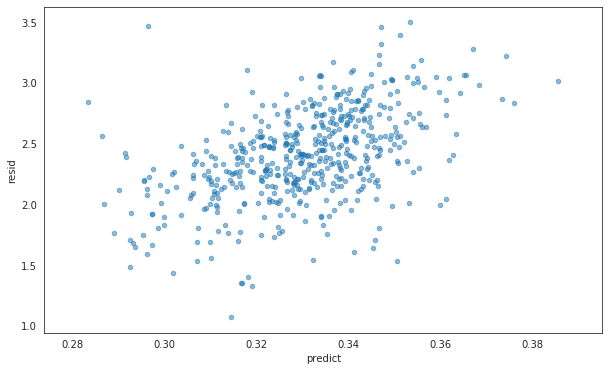

In [16]:
model = sm.OLS(y, X)
fit = model.fit()
df['predict']=fit.predict(np.log(X))
df['resid']= y-df.predict
with sns.axes_style('white'):
    plot = df.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))